# This is the plot script for homework 4 question 4.3, 4.4, 4.5 and 4.6

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from tensorboardX import SummaryWriter
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from typing import List, Dict, Any
import numpy as np


/Users/eric/miniconda3/envs/cs285/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# LLM: 'eval_return','train_return','train_ep_len','critic_loss','q_values','target_values',\
# Baseline: 'eval_return','train_return','train_ep_len','critic_loss','q_values','target_values',
# Eval: 'eval_return_0','eval_ep_len_0','eval_0/return_std','eval_0/return_max','eval_0/return_min','eval_0/ep_len_std','eval_0/ep_len_max','eval_0/ep_len_min','eval_return_1','eval_ep_len_1','eval_1/return_std','eval_1/return_max','eval_1/return_min','eval_1/ep_len_std','eval_1/ep_len_max','eval_1/ep_len_min'

## 50K

In [7]:
# Compare_Tag = ['eval_return','eval_ep_len','eval/return_std','eval/return_max','eval/return_min','eval/ep_len_std','eval/ep_len_max','eval/ep_len_min']
Compare_Tag = ['eval_return','eval/return_max']
LOG = 'data/eval_50k_10*100_dqn_LunarLander-v2_s16_l2_d0.99_doubleq_13-12-2023_11-12-21'
EVENT_ACCS = EventAccumulator(LOG).Reload()

event_acc = EVENT_ACCS

eval_return eval_return_0
eval_return eval_return_1


<Figure size 1000x500 with 0 Axes>

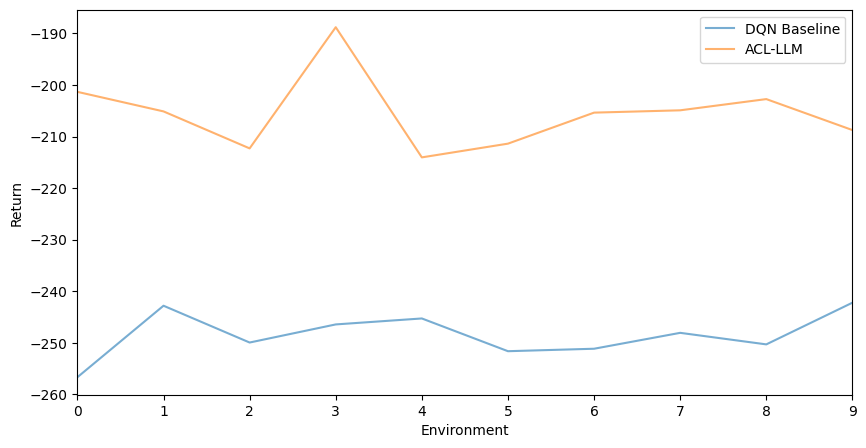

eval/return_max eval_0/return_max
eval/return_max eval_1/return_max


<Figure size 1000x500 with 0 Axes>

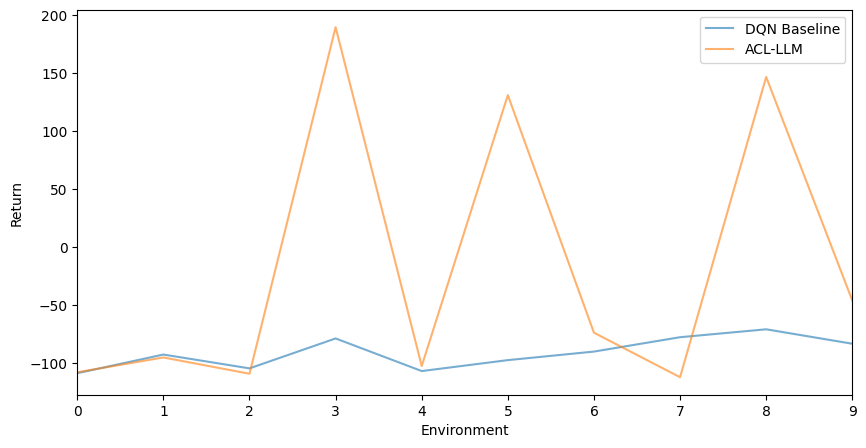

In [8]:
alpha_labels = ['DQN Baseline','ACL-LLM']
postfix = ['_0','_1']
for rawkey in Compare_Tag:
    plt.figure(figsize=(10, 5))
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    bar_width = 0.35
    opacity = 0.8
    
    for i in range(2):
        if '/' in rawkey:
            key = rawkey.split('/')
            key = key[0]+postfix[i]+'/'+key[1]
        else:
            key = rawkey+postfix[i]
        print(rawkey,key)
        scalar_keys = [key]
        if isinstance(scalar_keys, str):    
            scalar_keys = [scalar_keys]

        # Extract the scalar summaries
        scalars = {}
        for tag in scalar_keys:
            scalars_for_tag = event_acc.Scalars(tag)
            scalars[tag] = {
                'step': [s.step for s in scalars_for_tag],
                'wall_time': [s.wall_time for s in scalars_for_tag],
                'value': [s.value for s in scalars_for_tag],
            }
            ax.plot(scalars[tag]['step'],scalars[tag]['value'],label=alpha_labels[i],alpha=0.6)
            # index = np.arange(len(scalars[tag]['step']))
            # ax.bar(index + bar_width*i, scalars[tag]['value'], bar_width, alpha=opacity, label=alpha_labels[i])
    ax.legend(loc='upper right')
    ax.set_xlabel('Environment')
    ax.set_ylabel('Return')
    ax.set_xlim([0, 9])

    if 'max' in rawkey:
        fp = 'figures/50k_eval_max.png'
    else:
        fp = 'figures/50k_eval_return.png'
    plt.savefig(fp,dpi=300)
    plt.show()


## 100K

In [9]:
# Compare_Tag = ['eval_return','eval_ep_len','eval/return_std','eval/return_max','eval/return_min','eval/ep_len_std','eval/ep_len_max','eval/ep_len_min']
Compare_Tag = ['eval_return','eval/return_max']
LOG = 'data/eval_100k_10*100_dqn_LunarLander-v2_s16_l2_d0.99_doubleq_13-12-2023_11-09-47'
EVENT_ACCS = EventAccumulator(LOG).Reload()

event_acc = EVENT_ACCS

eval_return eval_return_0
eval_return eval_return_1


<Figure size 1000x500 with 0 Axes>

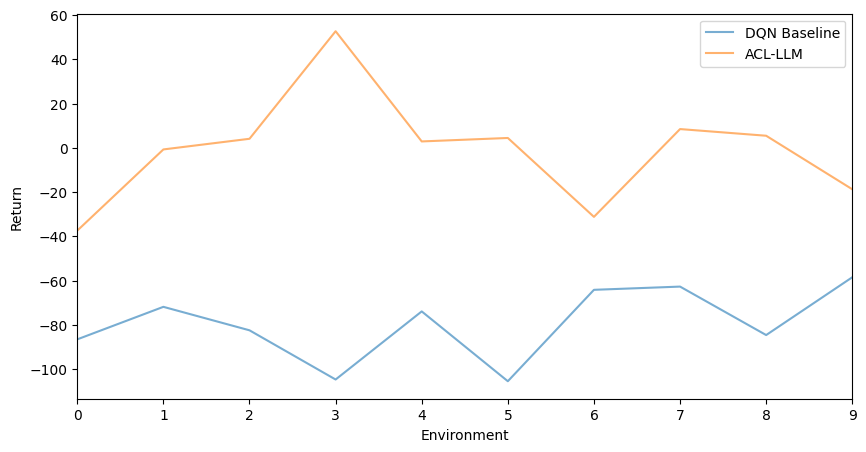

eval/return_max eval_0/return_max
eval/return_max eval_1/return_max


<Figure size 1000x500 with 0 Axes>

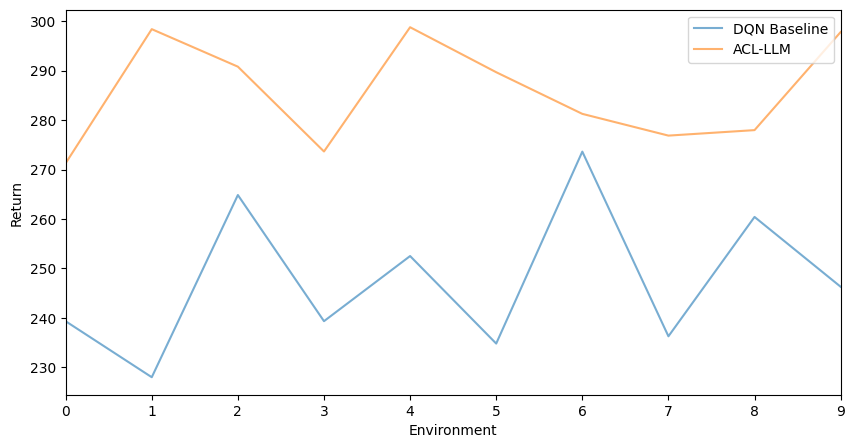

In [10]:
alpha_labels = ['DQN Baseline','ACL-LLM']
postfix = ['_0','_1']
for rawkey in Compare_Tag:
    plt.figure(figsize=(10, 5))
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    bar_width = 0.35
    opacity = 0.8
    
    for i in range(2):
        if '/' in rawkey:
            key = rawkey.split('/')
            key = key[0]+postfix[i]+'/'+key[1]
        else:
            key = rawkey+postfix[i]
        print(rawkey,key)
        scalar_keys = [key]
        if isinstance(scalar_keys, str):    
            scalar_keys = [scalar_keys]

        # Extract the scalar summaries
        scalars = {}
        for tag in scalar_keys:
            scalars_for_tag = event_acc.Scalars(tag)
            scalars[tag] = {
                'step': [s.step for s in scalars_for_tag],
                'wall_time': [s.wall_time for s in scalars_for_tag],
                'value': [s.value for s in scalars_for_tag],
            }
            ax.plot(scalars[tag]['step'],scalars[tag]['value'],label=alpha_labels[i],alpha=0.6)
            # index = np.arange(len(scalars[tag]['step']))
            # ax.bar(index + bar_width*i, scalars[tag]['value'], bar_width, alpha=opacity, label=alpha_labels[i])
    ax.legend()
    ax.set_xlabel('Environment')
    ax.set_ylabel('Return')
    ax.legend(loc='upper right')
    ax.set_xlim([0, 9])
    if 'max' in rawkey:
        fp = 'figures/100k_eval_max.png'
    else:
        fp = 'figures/100k_eval_return.png'
    plt.savefig(fp,dpi=300)
    plt.show()


## 300K

In [11]:
# Compare_Tag = ['eval_return','eval_ep_len','eval/return_std','eval/return_max','eval/return_min','eval/ep_len_std','eval/ep_len_max','eval/ep_len_min']
Compare_Tag = ['eval_return','eval/return_max']
LOG = 'data/eval_300k_10*100_dqn_LunarLander-v2_s16_l2_d0.99_doubleq_13-12-2023_10-50-38'
EVENT_ACCS = EventAccumulator(LOG).Reload()

event_acc = EVENT_ACCS

eval_return eval_return_0
eval_return eval_return_1


<Figure size 1000x500 with 0 Axes>

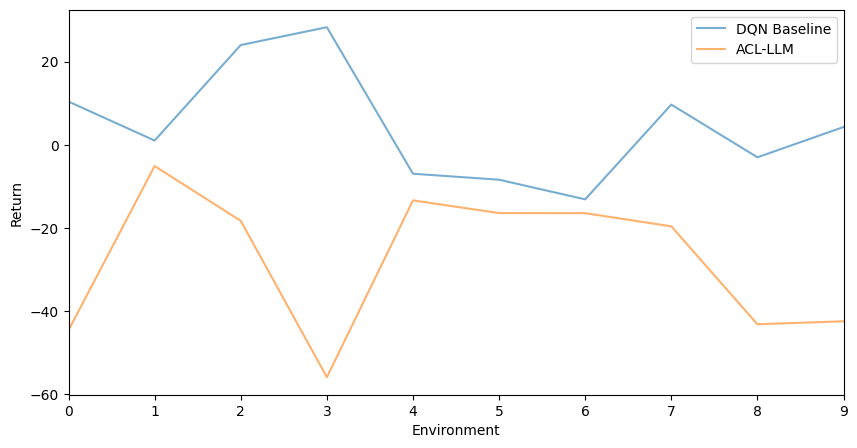

eval/return_max eval_0/return_max
eval/return_max eval_1/return_max


<Figure size 1000x500 with 0 Axes>

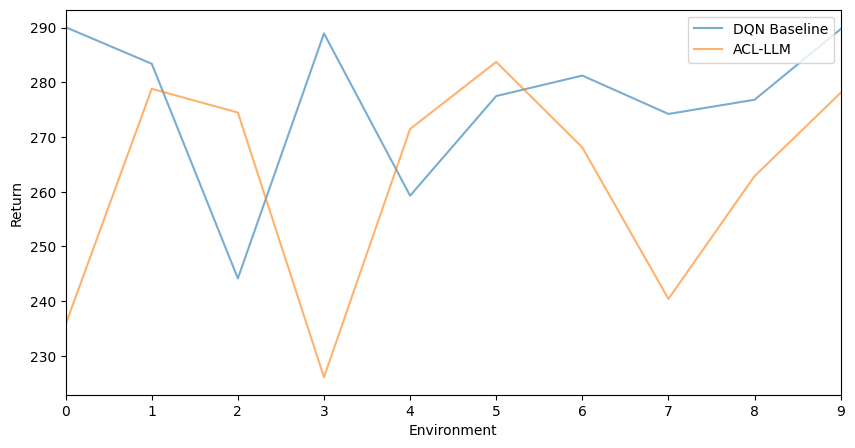

In [12]:
alpha_labels = ['DQN Baseline','ACL-LLM']
postfix = ['_0','_1']
for rawkey in Compare_Tag:
    plt.figure(figsize=(10, 5))
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    bar_width = 0.35
    opacity = 0.8
    
    for i in range(2):
        if '/' in rawkey:
            key = rawkey.split('/')
            key = key[0]+postfix[i]+'/'+key[1]
        else:
            key = rawkey+postfix[i]
        print(rawkey,key)
        scalar_keys = [key]
        if isinstance(scalar_keys, str):    
            scalar_keys = [scalar_keys]

        # Extract the scalar summaries
        scalars = {}
        for tag in scalar_keys:
            scalars_for_tag = event_acc.Scalars(tag)
            scalars[tag] = {
                'step': [s.step for s in scalars_for_tag],
                'wall_time': [s.wall_time for s in scalars_for_tag],
                'value': [s.value for s in scalars_for_tag],
            }
            ax.plot(scalars[tag]['step'],scalars[tag]['value'],label=alpha_labels[i],alpha=0.6)
            # index = np.arange(len(scalars[tag]['step']))
            # ax.bar(index + bar_width*i, scalars[tag]['value'], bar_width, alpha=opacity, label=alpha_labels[i])
    ax.legend()
    ax.set_xlabel('Environment')
    ax.set_ylabel('Return')
    ax.set_xlim([0, 9])
    ax.legend(loc='upper right')
    if 'max' in rawkey:
        fp = 'figures/300k_eval_max.png'
    else:
        fp = 'figures/300k_eval_return.png'
    plt.savefig(fp,dpi=300)
    plt.show()


In [14]:
# Compare_Tag = ['eval_return','train_return','train_ep_len','critic_loss','q_values','target_values',]
Compare_Tag = ['eval_return']
log = 'data/llm_10_envs_100000_feedback_period_dqn_LunarLander-v2_s16_l2_d0.99_doubleq_12-12-2023_21-39-48'
acc_list = EventAccumulator(log).Reload()
# alpha_labels = ['LLM ACL','DQN Baseline']


0
100000
200000
300000
400000
500000
600000
700000
800000
900000


<Figure size 1000x500 with 0 Axes>

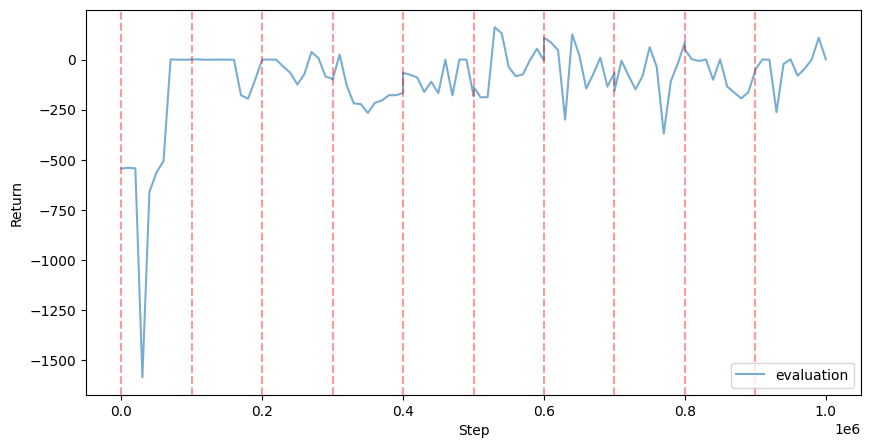

In [43]:

for key in Compare_Tag:
    plt.figure(figsize=(10, 5))
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    event_acc = acc_list
    scalar_keys = [key]
    if isinstance(scalar_keys, str):    
        scalar_keys = [scalar_keys]

    # Extract the scalar summaries
    scalars = {}
    for tag in scalar_keys:
        scalars_for_tag = event_acc.Scalars(tag)
        scalars[tag] = {
            'step': [s.step for s in scalars_for_tag],
            'wall_time': [s.wall_time for s in scalars_for_tag],
            'value': [s.value for s in scalars_for_tag],
        }
        step = scalars[tag]['step']
        n = len(step)//11
        new_step = [s+100000*(i//11)for i,s in enumerate(step)]
        ax.plot(new_step,scalars[tag]['value'],label='evaluation',alpha=0.6)
    for i in range(n):
        turning_point = i*100000
        print(turning_point)
        ax.axvline(x=turning_point, color='r', linestyle='--',alpha=0.4)
    ax.legend()
    ax.set_xlabel('Step')
    ax.set_ylabel('Return')
    # plt.title(f"{key} comparison between LLM ACL and DQN Baseline in training")
    plt.savefig(f'training returns.png',dpi=300)
    plt.show()

In [44]:
# Compare_Tag = ['eval_return','train_return','train_ep_len','critic_loss','q_values','target_values',]
Compare_Tag = ['eval_return']
log = 'data/baseline_dqn_100000_LunarLander-v2_s16_l2_d0.99_doubleq_12-12-2023_23-58-01'
acc_list = EventAccumulator(log).Reload()
# alpha_labels = ['LLM ACL','DQN Baseline']


0
100000
200000
300000
400000
500000
600000
700000
800000
900000


<Figure size 1000x500 with 0 Axes>

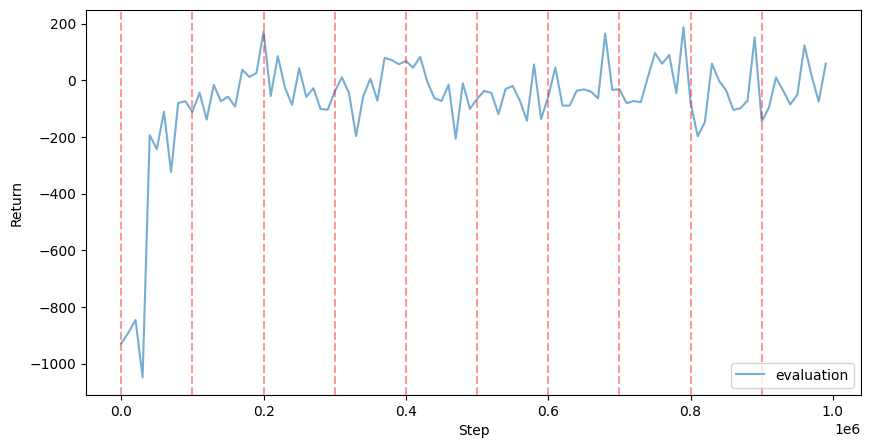

In [48]:

for key in Compare_Tag:
    plt.figure(figsize=(10, 5))
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    event_acc = acc_list
    scalar_keys = [key]
    if isinstance(scalar_keys, str):    
        scalar_keys = [scalar_keys]

    # Extract the scalar summaries
    scalars = {}
    for tag in scalar_keys:
        scalars_for_tag = event_acc.Scalars(tag)
        scalars[tag] = {
            'step': [s.step for s in scalars_for_tag],
            'wall_time': [s.wall_time for s in scalars_for_tag],
            'value': [s.value for s in scalars_for_tag],
        }
        step = scalars[tag]['step']
        n = len(step)//10
        new_step = [s+100000*(i//10)for i,s in enumerate(step)]
        ax.plot(new_step,scalars[tag]['value'],label='evaluation',alpha=0.6)
    for i in range(n):
        turning_point = i*100000
        print(turning_point)
        ax.axvline(x=turning_point, color='r', linestyle='--',alpha=0.4)
    ax.legend()
    ax.set_xlabel('Step')
    ax.set_ylabel('Return')
    # plt.title(f"{key} comparison between LLM ACL and DQN Baseline in training")
    plt.savefig(f'dqn training returns.png',dpi=300)
    plt.show()

In [47]:
step = scalars[tag]['step']

step

[0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000]